# Benchmark results

This notebook contains the results, visualization and analysis for the benchmarking comparison between three matrix multiplication methods: Naive, Blocked and Numpy's `dot()` (BLAS-backed).
Data comes from the `benchmarks/` folder which contains the dense and sparse CSV outputs produced by the benchmarking scripts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set_theme(style="whitegrid")

In [2]:
bench_dir = Path('.') / 'benchmarks'
dense_path = bench_dir / 'dense_results_from_main.csv'
sparse_path = bench_dir / 'sparse_results_from_main.csv'
dense = pd.read_csv(dense_path)
sparse = pd.read_csv(sparse_path)

In [7]:
print("Dense Results:")
print(dense)
print("Sparse Results:")
print(sparse)

Dense Results:
      n algorithm      time     cpu    memory
0    10     numpy  0.000004   0.680  0.000781
1    10   blocked  0.000008   0.000  0.006250
2    10     naive  0.000066   5.000  0.000000
3    50     numpy  0.000009   0.665  0.000391
4    50   blocked  0.000015   0.000  0.006250
5    50     naive  0.006791   7.340  0.006250
6   100     numpy  0.000045   0.760  0.007422
7   100   blocked  0.000120   0.000  0.013281
8   100     naive  0.053279   8.805  0.030469
9   256     numpy  0.000335  25.665  0.225000
10  256   blocked  0.001763  50.000  0.006641
11  256     naive  0.912070  11.725  0.200000
12  512     numpy  0.001916  53.880  0.523828
13  512   blocked  0.013386  50.655  0.006641
14  512     naive  7.944882   7.125  0.802344
Sparse Results:
      n  sparsity  density      time    cpu    memory
0    10     0.900    0.100  0.000180  0.000  0.052344
1    10     0.950    0.050  0.000139  0.000  0.000000
2    10     0.990    0.010  0.000137  0.000  0.000000
3    10     0.995

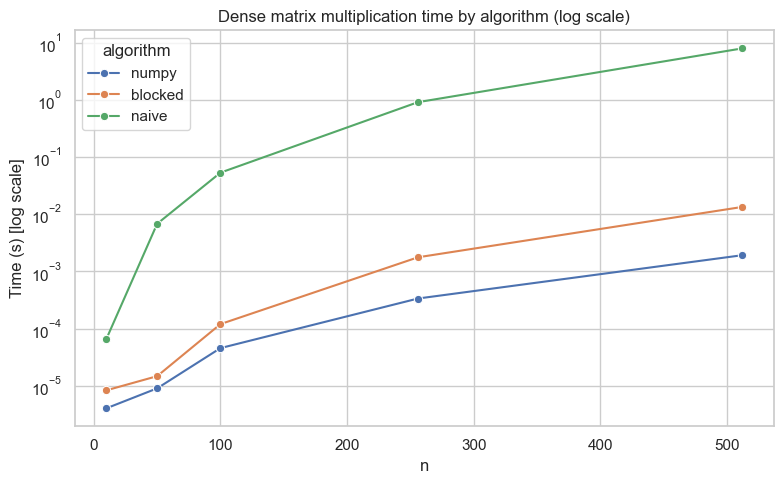

In [10]:
plt.figure(figsize=(8,5))
ax = sns.lineplot(data=dense, x='n', y='time', hue='algorithm', marker='o')
ax.set_yscale('log')
ax.set_title('Dense matrix multiplication time by algorithm (log scale)')
ax.set_ylabel('Time (s) [log scale]')
plt.tight_layout()
plt.show()

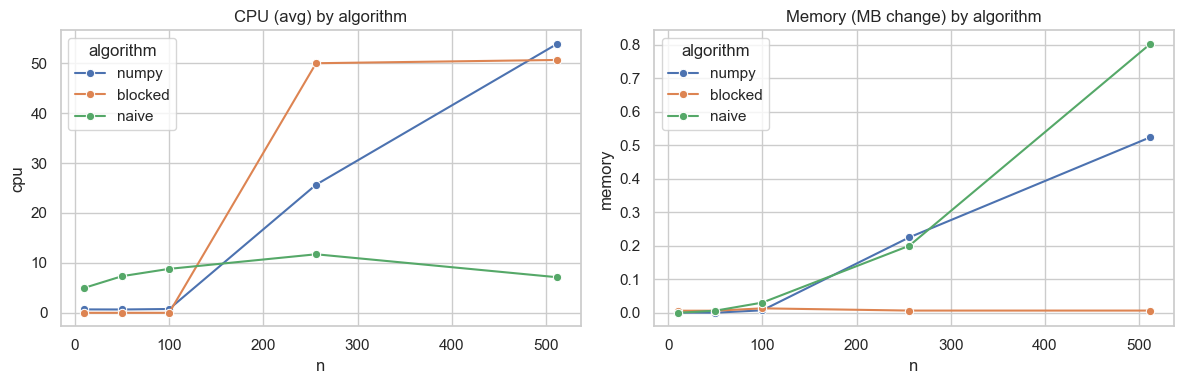

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.lineplot(data=dense, x='n', y='cpu', hue='algorithm', marker='o', ax=axes[0])
axes[0].set_title('CPU (avg) by algorithm')
sns.lineplot(data=dense, x='n', y='memory', hue='algorithm', marker='o', ax=axes[1])
axes[1].set_title('Memory (MB change) by algorithm')
plt.tight_layout()
plt.show()

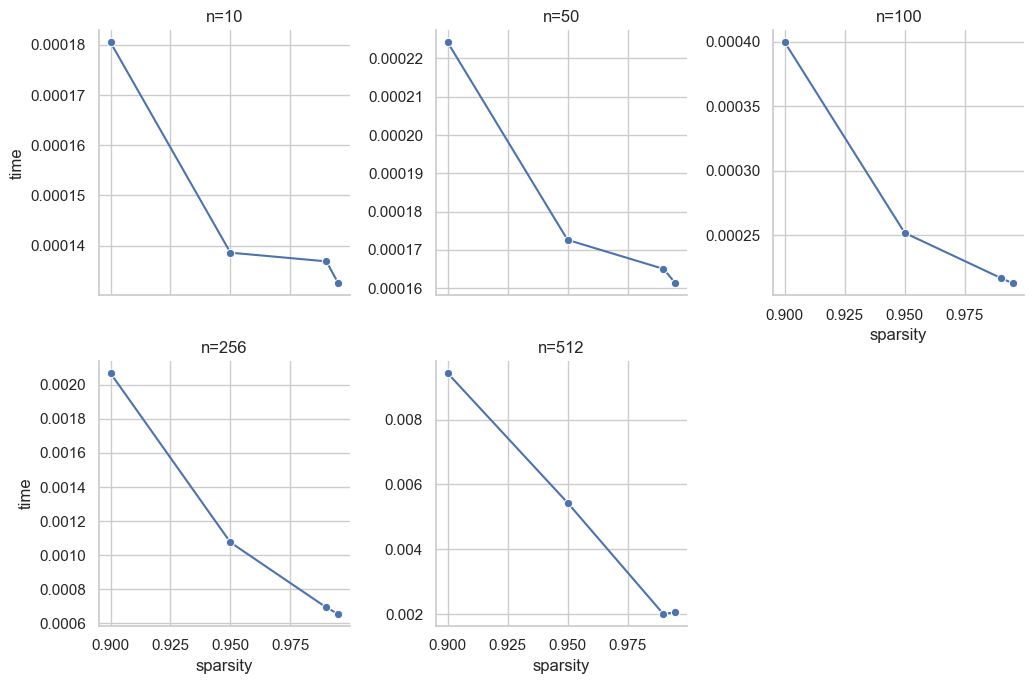

In [16]:
sparse['sparsity'] = pd.to_numeric(sparse['sparsity'])
grid = sns.FacetGrid(sparse, col='n', col_wrap=3, sharey=False, height=3.5)
grid.map_dataframe(sns.lineplot, x='sparsity', y='time', marker='o')
grid.set_titles('n={col_name}')
plt.tight_layout()
plt.show()

**Interpretation & Notes**
- Dense timings: `numpy` (BLAS) is the fastest for all sizes and scales well; `blocked` sits between `numpy` and `naive` as expected. The `naive` Python implementation scales very poorly as `n` grows.
- CPU/memory: CPU readings appear noisy (some zeros or spikes) and should be interpreted cautiously — `psutil.cpu_percent()` sampling semantics and OS scheduling cause noise. Memory delta recorded here is small for these test sizes but may grow for large matrices if conversions to dense arrays happen.
- Sparse results: time increases with matrix size and density (more nonzeros -> more work). For very low densities, sparse multiplication is extremely fast.
- Caveats: small sample counts, single-machine results, and measurement noise mean these are indicative rather than definitive. For robust conclusions, increase `--repeats`, record per-run raw metrics, and use median or trimmed means to reduce outlier impact.
**Suggested next steps**: run more repeats, add median/std columns, and (optionally) profile hotspots in the `blocked` implementation to optimize block size.